In [132]:
from queue import SimpleQueue

In [133]:
pos = (2, 3)

In [134]:
vertexQueue = SimpleQueue()
vertexQueue.put(pos)
                                    #    - - - 0 1 2 3
                                    #  3 * * * * * * *
horseMoves = ((2, -1), (2, 1),      #  2 * * X * X * *
              (-2, -1), (-2, 1),    #  1 * X * * * X *
              (1, 2), (-1, 2),      #  0 * * * H * * *
              (1, -2), (-1, -2))    # -1 * X * * * X *
                                    # -2 * * X * X * *
                                    # -3 * * * * * * *
gridData = {pos : [None, 0]} # read, parent, l

In [135]:
while not vertexQueue.empty():
    currentVertex = vertexQueue.get()
    for i in horseMoves:
        if(currentVertex[0]+i[0] >= 0 and currentVertex[1]+i[1] >= 0
        and currentVertex[0]+i[0] < 8 and currentVertex[1]+i[1] < 8
        and (currentVertex[0]+i[0], currentVertex[1]+i[1]) not in gridData):
            gridData[(currentVertex[0]+i[0], currentVertex[1]+i[1])] = [currentVertex, gridData[currentVertex][1] + 1]
            vertexQueue.put((currentVertex[0]+i[0], currentVertex[1]+i[1]))

gridData

{(2, 3): [None, 0],
 (4, 2): [(2, 3), 1],
 (4, 4): [(2, 3), 1],
 (0, 2): [(2, 3), 1],
 (0, 4): [(2, 3), 1],
 (3, 5): [(2, 3), 1],
 (1, 5): [(2, 3), 1],
 (3, 1): [(2, 3), 1],
 (1, 1): [(2, 3), 1],
 (6, 1): [(4, 2), 2],
 (6, 3): [(4, 2), 2],
 (2, 1): [(4, 2), 2],
 (5, 4): [(4, 2), 2],
 (3, 4): [(4, 2), 2],
 (5, 0): [(4, 2), 2],
 (3, 0): [(4, 2), 2],
 (6, 5): [(4, 4), 2],
 (2, 5): [(4, 4), 2],
 (5, 6): [(4, 4), 2],
 (3, 6): [(4, 4), 2],
 (5, 2): [(4, 4), 2],
 (3, 2): [(4, 4), 2],
 (1, 4): [(0, 2), 2],
 (1, 0): [(0, 2), 2],
 (1, 6): [(0, 4), 2],
 (1, 2): [(0, 4), 2],
 (4, 7): [(3, 5), 2],
 (2, 7): [(3, 5), 2],
 (4, 3): [(3, 5), 2],
 (0, 7): [(1, 5), 2],
 (0, 3): [(1, 5), 2],
 (4, 0): [(6, 1), 3],
 (7, 3): [(6, 1), 3],
 (5, 3): [(6, 1), 3],
 (7, 5): [(6, 3), 3],
 (5, 5): [(6, 3), 3],
 (7, 1): [(6, 3), 3],
 (5, 1): [(6, 3), 3],
 (0, 0): [(2, 1), 3],
 (3, 3): [(2, 1), 3],
 (1, 3): [(2, 1), 3],
 (6, 6): [(5, 4), 3],
 (4, 6): [(5, 4), 3],
 (6, 2): [(5, 4), 3],
 (2, 6): [(3, 4), 3],
 (2, 2): [(3

In [136]:
import numpy as np
def getTreeLevels(treeData : dict):
    depth = max(treeData.items(), key = lambda x : x[1][1])[1][1]
    levels = []
    for i in range(depth + 1):
        x = []
        y = []
        for j in treeData.items():
            if j[1][1] == i:
                x.append(j[0][0])
                y.append(j[0][1])
        levels.append((np.array(x), np.array(y)))
    return(levels)

BFSlevels = getTreeLevels(gridData)
BFSlevels

[(array([2]), array([3])),
 (array([4, 4, 0, 0, 3, 1, 3, 1]), array([2, 4, 2, 4, 5, 5, 1, 1])),
 (array([6, 6, 2, 5, 3, 5, 3, 6, 2, 5, 3, 5, 3, 1, 1, 1, 1, 4, 2, 4, 0, 0]),
  array([1, 3, 1, 4, 4, 0, 0, 5, 5, 6, 6, 2, 2, 4, 0, 6, 2, 7, 7, 3, 7, 3])),
 (array([4, 7, 5, 7, 5, 7, 5, 0, 3, 1, 6, 4, 6, 2, 2, 7, 5, 0, 3, 1, 6, 2,
         6, 2]),
  array([0, 3, 3, 5, 5, 1, 1, 0, 3, 3, 6, 6, 2, 6, 2, 7, 7, 6, 7, 7, 4, 4,
         0, 0])),
 (array([7, 7, 4, 4, 6, 7, 7, 0, 0]), array([2, 4, 5, 1, 7, 6, 0, 5, 1]))]

In [177]:
def getHexFromGradientRgb(iColor,  eColor, gradient):
    return "#{:02x}{:02x}{:02x}".format(int(iColor[0]*(1. - gradient) + eColor[0]*gradient), 
                                        int(iColor[1]*(1. - gradient) + eColor[1]*gradient),
                                        int(iColor[2]*(1. - gradient) + eColor[2]*gradient))

def getGradientRgb(iColor,  eColor, gradient):
    return (int(iColor[0]*(1. - gradient) + eColor[0]*gradient), 
            int(iColor[1]*(1. - gradient) + eColor[1]*gradient),
            int(iColor[2]*(1. - gradient) + eColor[2]*gradient))

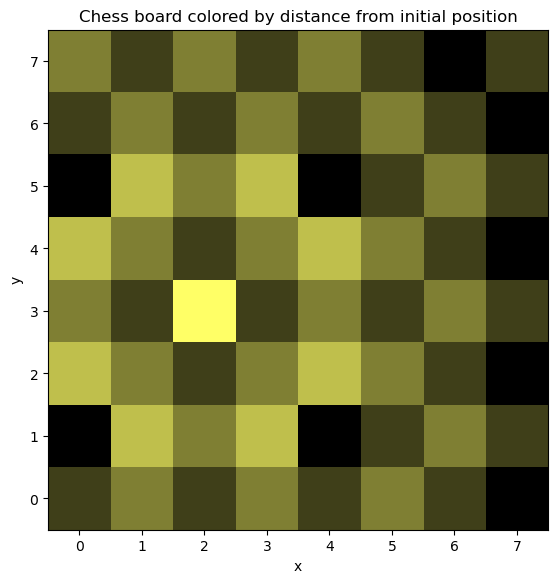

In [195]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
ax.imshow(chessBoard)
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board colored by distance from initial position')
plt.show()

In [139]:
endPos = (7,7)

In [156]:
currentVertex = endPos
path = [None for i in range(gridData[currentVertex][1]+1)]
while currentVertex != None:
    path[gridData[currentVertex][1]] = currentVertex
    currentVertex = gridData[currentVertex][0]

path

[(2, 3), (4, 4), (6, 5), (7, 7)]

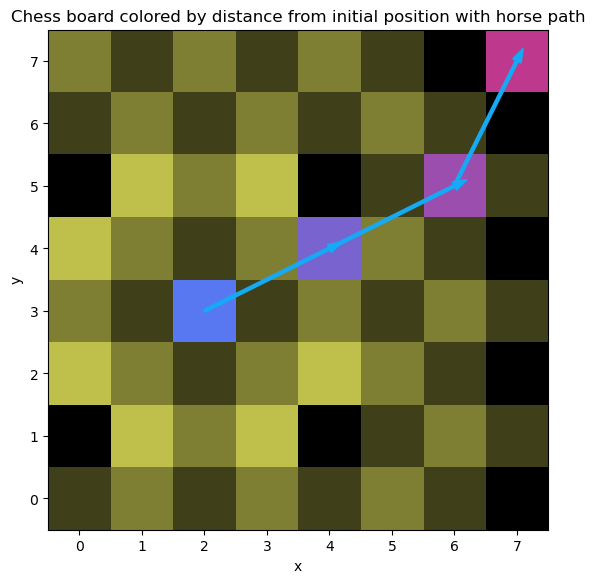

In [193]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])

for i in range(len(path)):
    chessBoard[path[i][1]][path[i][0]] = getGradientRgb((87, 120, 240), (190, 57, 141), i/(len(path) - 1))

ax.imshow(chessBoard)

for i in range(len(path) - 1):
    ax.arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

ax.invert_yaxis()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board colored by distance from initial position with horse path')
plt.show()

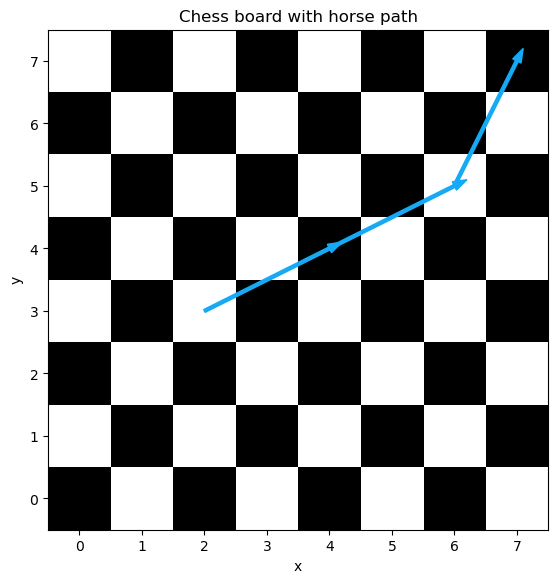

In [175]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
BFSDepth = len(BFSlevels)
chessBoard = np.array([[(i + j) % 2  for j in range(8)] for i in range(8)])
ax.imshow(chessBoard, cmap='gray') 

for i in range(len(path) - 1):
    ax.arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

ax.invert_yaxis()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Chess board with horse path')
plt.show()

camino mas rapido del vetice inicial al vertice final:  [(2, 3), (4, 4), (6, 5), (7, 7)]


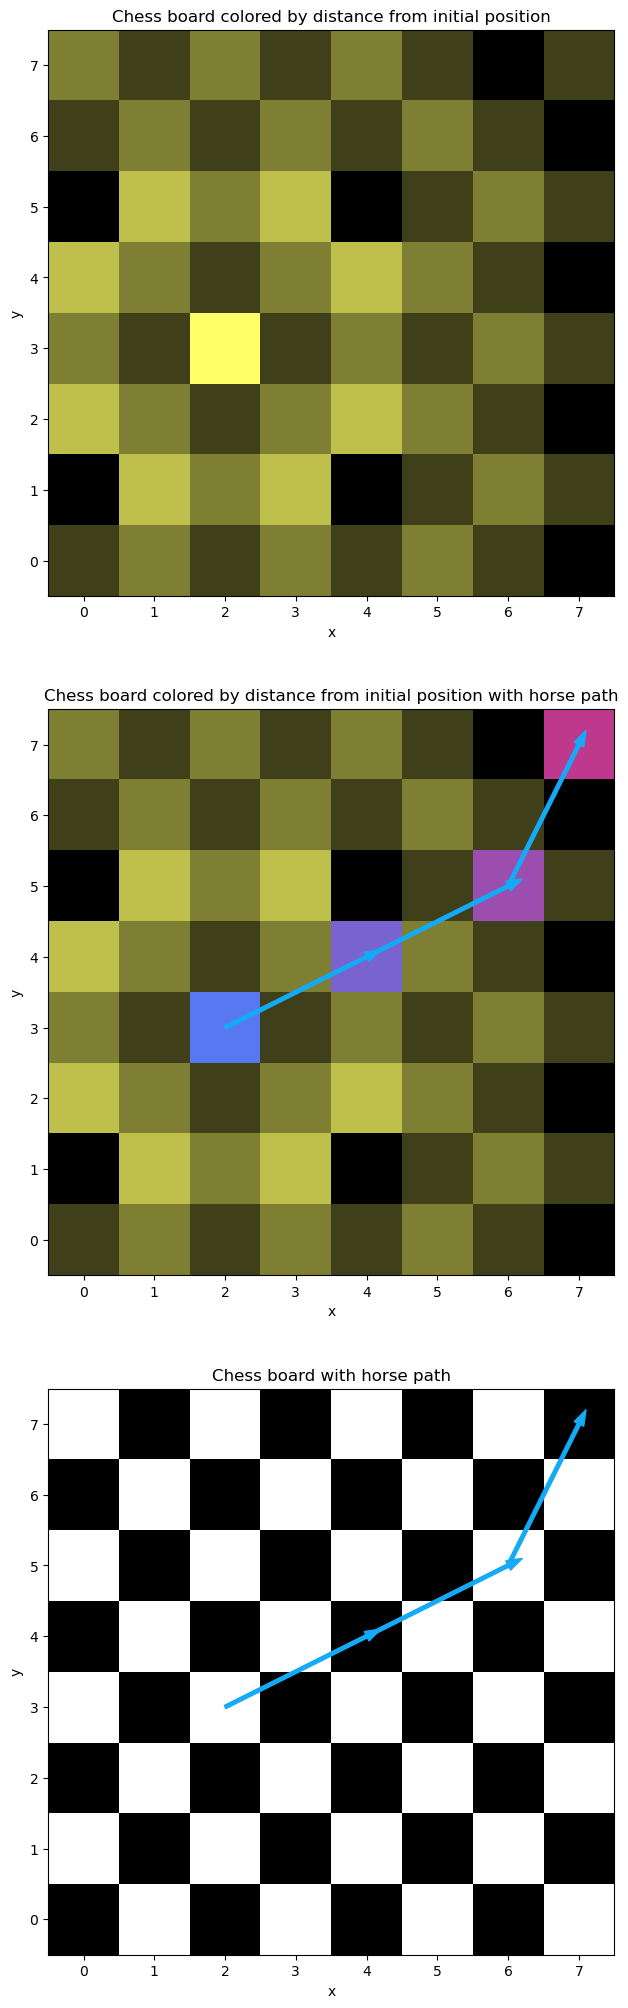

In [208]:
def getHorseShortestPathInChessboard8x8(pos, endPos):
    vertexQueue = SimpleQueue()
    vertexQueue.put(pos)
                                        #    - - - 0 1 2 3
                                        #  3 * * * * * * *
    horseMoves = ((2, -1), (2, 1),      #  2 * * X * X * *
                (-2, -1), (-2, 1),      #  1 * X * * * X *
                (1, 2), (-1, 2),        #  0 * * * H * * *
                (1, -2), (-1, -2))      # -1 * X * * * X *
                                        # -2 * * X * X * *
                                        # -3 * * * * * * *
    gridData = {pos : [None, 0]} # read, parent, l

    # Calcular caminos
    while not vertexQueue.empty():
        currentVertex = vertexQueue.get()
        for i in horseMoves:
            if(currentVertex[0]+i[0] >= 0 and currentVertex[1]+i[1] >= 0
            and currentVertex[0]+i[0] < 8 and currentVertex[1]+i[1] < 8
            and (currentVertex[0]+i[0], currentVertex[1]+i[1]) not in gridData):
                gridData[(currentVertex[0]+i[0], currentVertex[1]+i[1])] = [currentVertex, gridData[currentVertex][1] + 1]
                vertexQueue.put((currentVertex[0]+i[0], currentVertex[1]+i[1]))

    # Calcular camino al vertice
    currentVertex = endPos
    path = [None for i in range(gridData[currentVertex][1]+1)]
    while currentVertex != None:
        path[gridData[currentVertex][1]] = currentVertex
        currentVertex = gridData[currentVertex][0]
    
    print("camino mas rapido del vetice inicial al vertice final: ", path)

    # Graficas
    fig, ax = plt.subplots(3, figsize=(25, 25))

    # Ajedrez coloreado
    # ax[0]=fig.add_axes([0,0,1,1])
    BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
    chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
    ax[0].imshow(chessBoard)
    ax[0].invert_yaxis()
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title('Chess board colored by distance from initial position')

    # Ajedrez coloreado con camino
    # ax[1]=fig.add_axes([0,0,1,1])
    BFSDepth = max(gridData.items(), key = lambda x : x[1][1])[1][1]
    chessBoard = np.array([[getGradientRgb((255, 255, 102), (0, 0, 0), gridData[(j,i)][1]/BFSDepth)  for j in range(8)] for i in range(8)])
    for i in range(len(path)):
        chessBoard[path[i][1]][path[i][0]] = getGradientRgb((87, 120, 240), (190, 57, 141), i/(len(path) - 1))
    ax[1].imshow(chessBoard)
    for i in range(len(path) - 1):
        ax[1].arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")
    ax[1].invert_yaxis()
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('Chess board colored by distance from initial position with horse path')

    # Ajedrez con camino
    # ax[2]=fig.add_axes([0,0,1,1])
    BFSDepth = len(BFSlevels)
    chessBoard = np.array([[(i + j) % 2  for j in range(8)] for i in range(8)])
    ax[2].imshow(chessBoard, cmap='gray') 

    for i in range(len(path) - 1):
        ax[2].arrow(path[i][0], path[i][1], path[i+1][0] - path[i][0], path[i+1][1] - path[i][1], width = 0.05, color="#14aaf5")

    ax[2].invert_yaxis()

    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_title('Chess board with horse path')

    plt.show()

getHorseShortestPathInChessboard8x8((2,3), (7,7))